<a href="https://colab.research.google.com/github/Mbigdeli2003/Deep-Learning/blob/main/DNN_HW4_Q2_Morteza_Bigdeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

## CNN with Stride=1, padding=0

Epoch [1/150], Loss: 0.28851147463866894
Epoch [2/150], Loss: 0.11081634074804991
Epoch [3/150], Loss: 0.08844327560212932
Epoch [4/150], Loss: 0.07419585231453307
Epoch [5/150], Loss: 0.06492817806683655
Epoch [6/150], Loss: 0.06026929436223721
Epoch [7/150], Loss: 0.05516397936601263
Epoch [8/150], Loss: 0.049861361451724026
Epoch [9/150], Loss: 0.046887680159897596
Epoch [10/150], Loss: 0.043751811003759265
Epoch [11/150], Loss: 0.041933706527496915
Epoch [12/150], Loss: 0.039416062068719136
Epoch [13/150], Loss: 0.038055053344888755
Epoch [14/150], Loss: 0.03542793497436001
Epoch [15/150], Loss: 0.03566857577832877
Epoch [16/150], Loss: 0.031800661815983455
Epoch [17/150], Loss: 0.0326085675398629
Epoch [18/150], Loss: 0.030596290817895066
Epoch [19/150], Loss: 0.031046126447523685
Epoch [20/150], Loss: 0.029007434034810663
Epoch [21/150], Loss: 0.02781783036048056
Epoch [22/150], Loss: 0.027397884227135513
Epoch [23/150], Loss: 0.02703752649819795
Epoch [24/150], Loss: 0.027475290

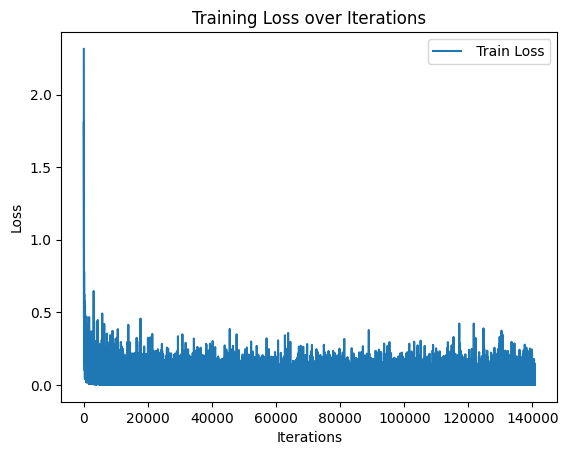

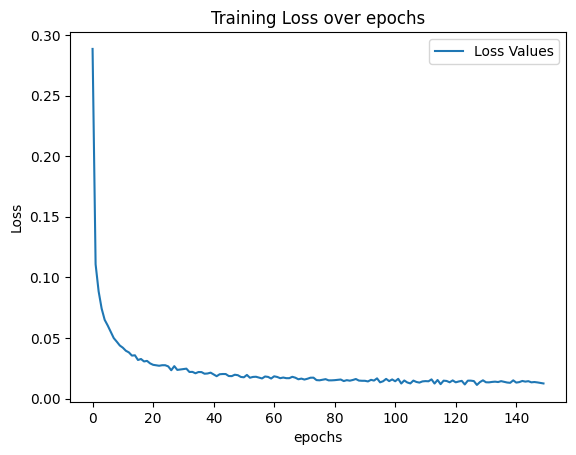

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624
Accuracy of the network on the 10000 test images: 98.72%


In [ ]:
from torchvision.datasets import MNIST
from torchvision.transforms import Resize, Compose, ToTensor, Normalize

# a) Calculate the normalization constants for MNIST
mnist_train = MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_test = MNIST(root='./data', train=False, download=True, transform=ToTensor())

train_mean = mnist_train.data.float().mean() /255
train_std = mnist_train.data.float().std() /255
test_mean = mnist_test.data.float().mean()/255
test_std = mnist_test.data.float().std() /255

# b) Build a Pytorch dataloader
transform = Compose([Resize((14, 14)), ToTensor(), Normalize((train_mean,), (train_std,))])

train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# c) Implement the CNN class
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 0)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 0)
        self.relu2 = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2, 0)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(800, 128)
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.log_softmax(x)
        return x

# d) Implement the training loop
model = CNN()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
train_loss_epochs=[]
num_epochs = 150
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_losses.append(loss.item())
    train_loss_epochs.append(running_loss / len(train_loader))
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')


plt.plot(train_losses, label=' Train Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()

plt.plot(train_loss_epochs, label='Loss Values')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training Loss over epochs')
plt.legend()
plt.show()

print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(mnist_train.data.min(), mnist_train.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(mnist_train.data.float().mean(), mnist_train.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(mnist_train.data.float().mean() / 255, mnist_train.data.float().std() / 255))
# e) Reach a test accuracy of > 99% on MNIST with CNN
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')
